In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from google.colab import files
files.upload()


{}

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#@title Default title text
import numpy as np
import pandas as pd
names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/KDDfulldata.csv', names=names)





In [0]:
total=len(data)
print("toal entries in the dataset\n",total)

toal entries in the dataset
 4898431


In [0]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [0]:
normal=0
threats=0
import csv
with open('/content/gdrive/My Drive/Colab Notebooks/KDDfulldata.csv','rt') as in_file:
    r=csv.reader(in_file)
    for row in r:
        rx=list(row)
        if rx[41]=='normal.':
            normal+=1
        else:
            threats+=1
                   
    print("\n the no of normal entries in dataset=",normal)
    print("\n the no of threats in dataset=",threats)
   


 the no of normal entries in dataset= 972781

 the no of threats in dataset= 3925650


In [0]:
#data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/KDDfulldata.csv')
arrdata=np.array(data)
uniq=np.unique(arrdata[:,-1])  #to get the unique class labels at last column

uniq_dict={}            # use dict to print unique threats with index(numbering)
for i in range(len(uniq)):
    uniq_dict[i]=uniq[i]
print("\n the unique threat labels at last column",uniq_dict)


 the unique threat labels at last column {0: 'back.', 1: 'buffer_overflow.', 2: 'ftp_write.', 3: 'guess_passwd.', 4: 'imap.', 5: 'ipsweep.', 6: 'land.', 7: 'loadmodule.', 8: 'multihop.', 9: 'neptune.', 10: 'nmap.', 11: 'normal.', 12: 'perl.', 13: 'phf.', 14: 'pod.', 15: 'portsweep.', 16: 'rootkit.', 17: 'satan.', 18: 'smurf.', 19: 'spy.', 20: 'teardrop.', 21: 'warezclient.', 22: 'warezmaster.'}


In [0]:
data.shape

(4898431, 42)

In [0]:
data.drop_duplicates(subset=None, keep='first', inplace=True)
data.shape

(1074992, 42)

In [0]:
data['label'].value_counts()

normal.             812814
neptune.            242149
satan.                5019
ipsweep.              3723
portsweep.            3564
smurf.                3007
nmap.                 1554
back.                  968
teardrop.              918
warezclient.           893
pod.                   206
guess_passwd.           53
buffer_overflow.        30
warezmaster.            20
land.                   19
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64

In [0]:
import matplotlib.pyplot as plt

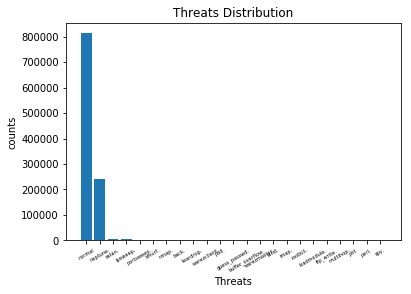

In [0]:
label = ['normal','neptune.','satan.','ipsweep.','portsweep.','smurf.','nmap.','back.','teardrop.','warezclient.','pod.','guess_passwd.','buffer_overflow.',        
'warezmaster.','land.','imap.','rootkit.','loadmodule.','ftp_write.','multihop.','phf.','perl.','spy.']
counts= [812814,242149,5019,3723,3564,3007,1554,968,918,893,206,53,30,20,19,12,10,9,8,7,4,3,2]
index = np.arange(len(label))
plt.bar(index,counts)
plt.xlabel('Threats', fontsize=10)
plt.ylabel('counts', fontsize=10)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('Threats Distribution')
plt.show()

In [0]:
data['protocol_type'] = data['protocol_type'].astype('category')
data['service'] = data['service'].astype('category')
data['flag'] = data['flag'].astype('category')
data['label'] = data['label'].astype('category')
cat_columns = data.select_dtypes(['category']).columns
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)

In [0]:
arrdata=np.array(data)
uniq=np.unique(arrdata[:,-1])  #to get the unique class labels at last column

uniq_dict={}            # use dict to print unique threats with index(numbering)
for i in range(len(uniq)):
    uniq_dict[i]=uniq[i]
print("\n the unique threat labels at last column",uniq_dict)


 the unique threat labels at last column {0: 0.0, 1: 1.0, 2: 2.0, 3: 3.0, 4: 4.0, 5: 5.0, 6: 6.0, 7: 7.0, 8: 8.0, 9: 9.0, 10: 10.0, 11: 11.0, 12: 12.0, 13: 13.0, 14: 14.0, 15: 15.0, 16: 16.0, 17: 17.0, 18: 18.0, 19: 19.0, 20: 20.0, 21: 21.0, 22: 22.0}


In [0]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,24,9,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,11
1,0,1,24,9,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,11
2,0,1,24,9,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,11
3,0,1,24,9,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,11
4,0,1,24,9,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,11


In [0]:
# converting multiclass to binary 0->threats, 1-> normal
data["label"]= data["label"].replace((0,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20,21,22), "0")
data["label"]= data["label"].replace(11, "1")

In [0]:
data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,24,9,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1
1,0,1,24,9,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,1
2,0,1,24,9,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,1
3,0,1,24,9,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,1
4,0,1,24,9,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,1
5,0,1,24,9,238,1282,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,1
6,0,1,24,9,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6,6,1.0,0.0,0.17,0.0,0.0,0.0,0.0,0.0,1
7,0,1,24,9,234,1364,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7,7,1.0,0.0,0.14,0.0,0.0,0.0,0.0,0.0,1
8,0,1,24,9,239,1295,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,7,7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8,8,1.0,0.0,0.12,0.0,0.0,0.0,0.0,0.0,1
9,0,1,24,9,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,1


In [0]:
arrdata=np.array(data)
uniq=np.unique(arrdata[:,-1])  #to get the unique class labels at last column

uniq_dict={}            # use dict to print unique threats with index(numbering)
for i in range(len(uniq)):
    uniq_dict[i]=uniq[i]
print("\n the unique threat labels at last column",uniq_dict)


 the unique threat labels at last column {0: '0', 1: '1'}


In [0]:
data['label'].value_counts()

1    812814
0    262178
Name: label, dtype: int64

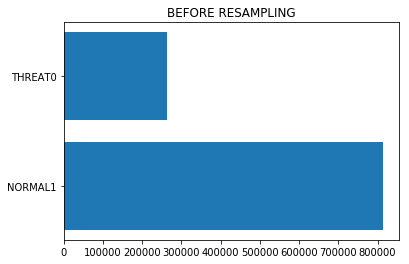

In [0]:
threat = [812814,262178]
bars = ('NORMAL1','THREAT0')
y_pos = np.arange(len(bars))
plt.barh(y_pos, threat)
plt.yticks(y_pos, bars)
plt.title('BEFORE RESAMPLING')
plt.show()



In [0]:
X=data.iloc[:,0:41]
Y=data.iloc[:,41]

In [0]:
X.shape

(1074992, 41)

In [0]:
Y.shape

(1074992,)

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [0]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(10,'Score'))

                       Specs         Score
4                  src_bytes  9.560880e+09
5                  dst_bytes  8.805908e+08
22                     count  1.092648e+08
32        dst_host_srv_count  4.518586e+07
31            dst_host_count  1.561833e+07
0                   duration  4.092546e+06
2                    service  1.804307e+06
38  dst_host_srv_serror_rate  6.253321e+05
25           srv_serror_rate  6.223632e+05
24               serror_rate  6.219760e+05


In [0]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[3.90587773e-04 8.48187044e-03 1.91473374e-02 2.58943723e-02
 4.69075131e-03 1.49744342e-03 5.60011778e-06 2.76321626e-03
 7.58604220e-06 1.87411695e-03 9.37814144e-05 2.76697005e-03
 1.64953232e-03 4.89281639e-05 1.24779187e-05 5.94411764e-05
 6.55637495e-05 1.31130855e-05 1.29762467e-05 0.00000000e+00
 5.04319390e-07 1.92177770e-04 2.77911501e-02 4.30325183e-03
 3.03227182e-04 1.45574528e-01 1.80509183e-02 2.37003888e-02
 5.02320020e-03 1.47688187e-02 5.37169098e-03 2.07349951e-02
 1.35836602e-01 1.44713507e-02 3.29333997e-03 7.21138814e-03
 5.36080794e-03 2.87120216e-01 1.79348407e-01 3.08922805e-02
 1.17509040e-03]


In [0]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)
dfscores=pd.DataFrame(model.feature_importances_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(10,'Score'))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


                       Specs     Score
24               serror_rate  0.143670
38  dst_host_srv_serror_rate  0.108394
3                       flag  0.093823
25           srv_serror_rate  0.090399
29             diff_srv_rate  0.088580
32        dst_host_srv_count  0.074269
37      dst_host_serror_rate  0.072543
22                     count  0.062369
11                 logged_in  0.059132
26               rerror_rate  0.031706


In [0]:
# Intersection{22,24,25,31,32}
# Union{0,2,3,4,5,22,24,25,28,31,32,33,37,38}

#Ranking wise
#kbest{4,5,38,25,24,32,0,2,31,22}
#ETC {25,11,24,37,32,33,31,22,3,28}

In [0]:
#creating new data of common (intersection) columns
new_dataI=data.loc[:,['count','serror_rate','srv_serror_rate','dst_host_count','dst_host_srv_count','label']]
new_dataU=data.loc[:,['duration','service','flag','src_bytes','dst_bytes','count','serror_rate','srv_serror_rate','same_srv_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_serror_rate','dst_host_srv_serror_rate','label']]

In [0]:
new_dataI.head()

,count,serror_rate,srv_serror_rate,dst_host_count,dst_host_srv_count,label
0,1,0.0,0.0,0,0,1
1,2,0.0,0.0,1,1,1
2,1,0.0,0.0,2,2,1
3,2,0.0,0.0,3,3,1
4,3,0.0,0.0,4,4,1


In [0]:
new_dataI.shape

(1074992, 6)

In [0]:
new_dataU.tail()

,duration,service,flag,src_bytes,dst_bytes,count,serror_rate,srv_serror_rate,same_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,label
4898426,0,24,9,212,2288,3,0.0,0.0,1.0,3,255,1.0,0.0,0.01,1
4898427,0,24,9,219,236,4,0.0,0.0,1.0,4,255,1.0,0.0,0.01,1
4898428,0,24,9,218,3610,5,0.0,0.0,1.0,5,255,1.0,0.0,0.01,1
4898429,0,24,9,219,1234,6,0.0,0.0,1.0,6,255,1.0,0.0,0.01,1
4898430,0,24,9,219,1098,1,0.0,0.0,1.0,7,255,1.0,0.0,0.01,1


In [0]:
new_dataU.shape

(1074992, 15)

In [0]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [0]:
# apply normalize and standardize to new_dataI
targetI=new_dataI.iloc[:,-1]  # save class label(last column) before normalize and standardize
dataI = preprocessing.normalize(new_dataI.iloc[:,0:5])  #normalize
scaler = preprocessing.StandardScaler()
dataI = scaler.fit_transform(dataI)     #standardize

# apply normalize and standardize to new_dataU
targetU=new_dataU.iloc[:,-1]  # save class label(last column) before normalize and standardize
dataU = preprocessing.normalize(new_dataU.iloc[:,0:14])  #normalize
scaler = preprocessing.StandardScaler()
dataU = scaler.fit_transform(dataU)     #standardize

In [0]:
dataI.shape

(1074992, 5)

In [0]:
targetI.shape

(1074992,)

In [0]:
dataU.shape

(1074992, 14)

In [0]:
targetU.shape

(1074992,)

In [0]:
# split dataI into train and test
train_XI, test_XI, train_YI, test_YI = train_test_split(dataI, targetI,test_size=0.25,random_state=2)
# split dataU into train and test
train_XU, test_XU, train_YU, test_YU = train_test_split(dataU, targetU,test_size=0.25,random_state=2)

In [0]:
print("for intersection\n")
print("Before OverSampling, counts of label NORMAL '1':\n") 
print("Before OverSampling, counts of label THREAT '0':\n")
train_YI.value_counts()

for intersection

Before OverSampling, counts of label NORMAL '1':

Before OverSampling, counts of label THREAT '0':



1    609746
0    196498
Name: label, dtype: int64

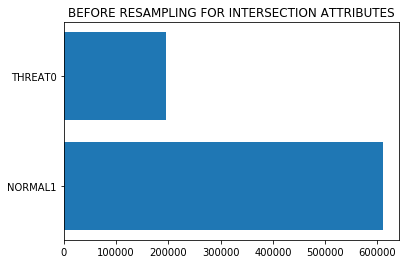

In [0]:
threat = [609746,196498]
bars = ('NORMAL1','THREAT0')
y_pos = np.arange(len(bars))
plt.barh(y_pos, threat)
plt.yticks(y_pos, bars)
plt.title('BEFORE RESAMPLING FOR INTERSECTION ATTRIBUTES')
plt.show()

In [0]:
print("for union\n")
print("Before OverSampling, counts of label NORMAL '1':\n") 
print("Before OverSampling, counts of label THREAT '0':\n")
train_YU.value_counts()

for union

Before OverSampling, counts of label NORMAL '1':

Before OverSampling, counts of label THREAT '0':



1    609746
0    196498
Name: label, dtype: int64

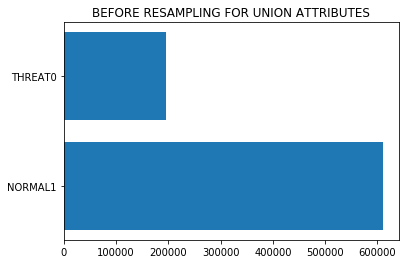

In [0]:
threat = [609746,196498]
bars = ('NORMAL1','THREAT0')
y_pos = np.arange(len(bars))
plt.barh(y_pos, threat)
plt.yticks(y_pos, bars)
plt.title('BEFORE RESAMPLING FOR UNION ATTRIBUTES')
plt.show()

In [0]:
#for imbalanced dataset
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets 
clf.fit(train_XI,train_YI)
y_predI=clf.predict(test_XI)

#Create a Gaussian Classifier
#clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets 
clf.fit(train_XU,train_YU)
y_predU=clf.predict(test_XU)

In [0]:
#for imbalanced dataset
from sklearn import metrics
print("Using random forest classifier for imbalanced dataset\n")
print("Accuracy for intersection features:",metrics.accuracy_score(test_YI, y_predI))
print("\nAccuracy for union features:",metrics.accuracy_score(test_YU, y_predU))

Using random forest classifier for imbalanced dataset

Accuracy for intersection features: 0.9881375861401759

Accuracy for union features: 0.999717207197821


In [0]:
import pickle

In [0]:
saved_model = pickle.dumps(clf)

In [0]:
# Load the pickled model 
clf = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
#y_predU=clf.predict(test_XU)
#print("\nAccuracy for union features:",metrics.accuracy_score(test_YU, y_predU))

In [0]:
pip install six

In [0]:
#for balancing the dataset, used SMOTE
from imblearn.over_sampling import SMOTE 
sm = SMOTE() 
X_train_res, y_train_res = sm.fit_sample(train_XU,train_YU)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
print("for union\n")
print("after OverSampling, counts of label NORMAL '1':\n") 
print("after OverSampling, counts of label THREAT '0':\n")
sr=pd.Series(y_train_res)
sr.value_counts()

for union

after OverSampling, counts of label NORMAL '1':

after OverSampling, counts of label THREAT '0':



0    609746
1    609746
dtype: int64

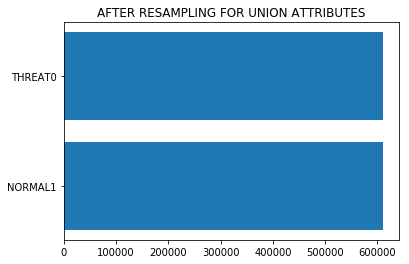

In [0]:
threat = [609746,609746]
bars = ('NORMAL1','THREAT0')
y_pos = np.arange(len(bars))
plt.barh(y_pos, threat)
plt.yticks(y_pos, bars)
plt.title('AFTER RESAMPLING FOR UNION ATTRIBUTES')
plt.show()

In [0]:
#for balanced dataset
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train_res,y_train_res)
y_predU=clf.predict(test_XU)

In [0]:
print("\nAccuracy for union features after balancing:",metrics.accuracy_score(test_YU, y_predU))


Accuracy for union features after balancing: 0.9997618586929019


In [0]:
#predicting new sample
Xnew=[[0,24,9,215,45076,1,0.0,0.0,1.0,0,0,0.0,0.0,0.0],[0,24,9,219,1098,1,0.0,0.0,1.0,7,255,1.0,0.0,0.01]]
pred=clf.predict(Xnew)
for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" %(Xnew[i],pred[i]))
	

X=[0, 24, 9, 215, 45076, 1, 0.0, 0.0, 1.0, 0, 0, 0.0, 0.0, 0.0], Predicted=1
X=[0, 24, 9, 219, 1098, 1, 0.0, 0.0, 1.0, 7, 255, 1.0, 0.0, 0.01], Predicted=1


In [0]:
#using K-FOLD cross validation
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
scores = []
kf= KFold(n_splits=10, random_state=None, shuffle=True)
for train_index, test_index in kf.split(X_train_res):
    X_train, X_test, y_train, y_test = X_train_res[train_index], X_train_res[test_index], y_train_res[train_index], y_train_res[test_index]
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
print(scores)

#another way
#from sklearn.model_selection import KFold,cross_val_score 
#scores=cross_val_score(clf, X_train_res,y_train_res,cv=10)

[0.9997211972119722, 0.9997457974579745, 0.9997457953734757, 0.9997785959704467, 0.9997375952242331, 0.9997293950749904, 0.999770395821204, 0.9998113965674176, 0.9997539955227185, 0.9998113965674176]


In [0]:
print(np.mean(scores))

0.999760556079185


In [0]:
import pickle
nbfilename = 'nb_classifier.pkl'
nbmodel=open(nbfilename, 'wb')
pickle.dump(clf,nbmodel)
nbmodel.close()

In [0]:
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)

In [46]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(X_train_res,y_train_res)

predicted= nb.predict(test_XU)
print("\nAccuracy for union features after balancing using NB",metrics.accuracy_score(test_YU,predicted))


Accuracy for union features after balancing using NB 0.9827570809829282


In [0]:
#save the NB model in pkl format
import pickle
nbfilename = 'nb_classifier.pkl'
nbmodel=open(nbfilename, 'wb')
pickle.dump(nb,nbmodel)
nbmodel.close()

In [52]:
#load the NB model
nbmodel_pkl=open(nbfilename,'rb')
nbmodel=pickle.load(nbmodel_pkl)
result = nbmodel.score(test_XU,test_YU)
print("\n prediction after loadin the module",result)
 
# for new sample 
Xnew=[[0,24,9,215,45076,1,0.0,0.0,1.0,0,0,0.0,0.0,0.0],[0,24,9,219,1098,1,0.0,0.0,1.0,7,255,1.0,0.0,0.01]]
pred=nbmodel.predict(Xnew)
print("predicting new sample\n")
for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" %(Xnew[i],pred[i]))
	


 prediction after loadin the module 0.9827570809829282
predicting new sample

X=[0, 24, 9, 215, 45076, 1, 0.0, 0.0, 1.0, 0, 0, 0.0, 0.0, 0.0], Predicted=1
X=[0, 24, 9, 219, 1098, 1, 0.0, 0.0, 1.0, 7, 255, 1.0, 0.0, 0.01], Predicted=1
